In [11]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.set(rc={"font.size":13,"axes.labelsize":13,"xtick.labelsize":13,"ytick.labelsize":13,"savefig.dpi":200,"figure.figsize":(7, 2.5 ),"lines.linewidth": 2})
sns.set_style("white")
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [12]:
gpu_type_count = pd.read_csv('gpu_type_count.csv')

In [13]:
def map_type_to_group(type_value):
    if 'A100' in type_value:
        return 'A100'
    elif 'A10' in type_value:
        return 'A10'
    elif 'A100' in type_value:
        return 'A100'
    elif 'A800' in type_value:
        return 'A800'
    elif 'H800' in type_value:
        return 'H100'
    elif 'PPU' in type_value:
        return 'xPU'
    # elif 'Quadro' in type_value:
        # return 'Quadro'
    elif 'GeForce' in type_value:
        return 'RTX'
    elif 'Tesla_T4' in type_value:
        return 'T4'
    elif 'Tesla_P100' in type_value:
        return 'P100'
    elif 'Tesla_V100' in type_value:
        return 'V100'
    
    else:
        return 'Other'

In [14]:
idx = gpu_type_count.groupby('type')['value'].idxmax()
result_df = gpu_type_count.loc[idx]
# result_df['type'] = result_df['type'].str.replace('-', '_').str.replace('NVIDIA_','').str.replace('_SXM4','').str.replace('_SXM','')
result_df['group'] = result_df['type'].apply(map_type_to_group)
# 根据'type'分组，并对'value'求和
result_df = result_df.groupby('group')['value'].sum().reset_index()
result_df['value'] = result_df['value'].astype(int)
# A10 A100 A800 H800 PPU_ZW Quadro_RTX_* GeForce_RTX_* Tesla_T4 Tesla_P100 Tesla_V100
result_df.to_csv('clean_gpu_type.csv')
result_df

,group,value
0,A10,22576
1,A100,858
2,A800,138
3,H100,154
4,Other,317
5,P100,3601
6,RTX,1954
7,T4,11073
8,V100,6740
9,xPU,4149


/tmp/ipykernel_251015/3037593987.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 50000)


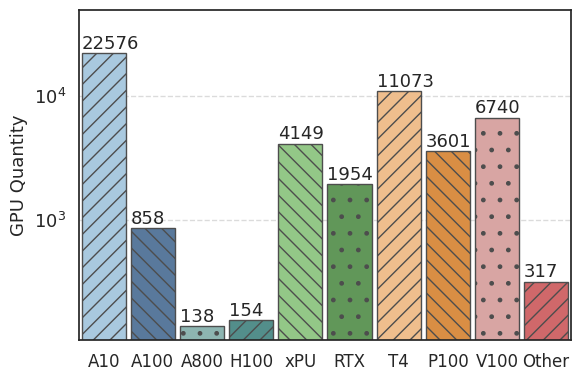

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
colors=["#F2AF82","#BCD5AB","#FFD966","#BDD5ED","#F17B6D","#F2AF82","#BCD5AB","#FFD966","#BDD5ED","#F17B6D","#302d22","#c1070f"]
# colors=[ "#a5d296",  "#fff1b9",  "#ffc952",  "#47b8e0", "#f26d5b",  "#a5d296",  "#fff1b9",  "#ffc952",  "#47b8e0", "#f26d5b", "#B6992D",  "#F1CE63"]
colors=[ "#A0CBE8","#4E79A7",  "#86BCB6","#499894",   "#8CD17D","#59A14F",  "#FFBE7D","#F28E2B",    "#E19D9A","#E15759",  "#F1CE63",  "#B6992D"]

hatch=["//","\\\\",".","//","\\\\",".","//","\\\\",".","//"]
# sns.barplot(x='group', y='value', data=result_df, ax=ax, palette='Set2')
sns.barplot(x='group', y='value', data=result_df, ax=ax, palette=colors, edgecolor="#4D4D4D", hatch=hatch, width=0.9, order=['A10', 'A100', 'A800', 'H100', 'xPU', 'RTX', 'T4', 'P100', 'V100', 'Other'])
# sns.barplot(x='group', y='value', data=result_df, ax=ax, color="#f5716a", hatch=hatch)
ax.set_xlabel('')

ax.set_ylabel('GPU Quantity', fontsize=13)
ax.set_yscale('log')
ax.set_ylim(0, 50000)
ax.xaxis.set_tick_params(labelsize=12)
ax.grid(axis="y", linestyle='--', alpha=0.7)
# show number on bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1, p.get_height() * 1.08))
plt.tight_layout()
plt.savefig('plots/gpu_type_count.pdf', dpi=120, bbox_inches='tight')
plt.show()
